In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Importing the dataset
data = pd.read_csv('hdddata.csv')
#Removing null values
data.dropna(axis=0, inplace=True)
data.dropna(axis=1, inplace=True)
df=data.iloc[:,1:49:2] #data if included raw data is also used, df is used for only normalized values
df

,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_183_normalized,smart_184_normalized,...,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
0,115.0,96.0,100.0,100.0,89.0,62.0,100.0,100.0,100.0,100.0,...,100.0,100.0,98.0,30.0,100.0,100.0,200.0,100.0,100.0,100.0
1,111.0,92.0,100.0,100.0,81.0,58.0,100.0,100.0,100.0,100.0,...,100.0,100.0,70.0,24.0,100.0,100.0,200.0,100.0,100.0,100.0
2,119.0,94.0,100.0,100.0,90.0,77.0,100.0,100.0,100.0,100.0,...,100.0,100.0,90.0,31.0,100.0,100.0,200.0,100.0,100.0,100.0
3,111.0,92.0,100.0,100.0,85.0,68.0,100.0,100.0,100.0,100.0,...,100.0,100.0,95.0,23.0,100.0,100.0,200.0,100.0,100.0,100.0
4,117.0,92.0,100.0,100.0,90.0,78.0,100.0,100.0,100.0,100.0,...,100.0,100.0,95.0,36.0,100.0,100.0,200.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38440,118.0,91.0,100.0,100.0,88.0,62.0,100.0,100.0,100.0,100.0,...,100.0,100.0,37.0,28.0,100.0,100.0,200.0,100.0,100.0,100.0
38441,118.0,91.0,100.0,100.0,83.0,56.0,100.0,100.0,100.0,100.0,...,100.0,100.0,64.0,25.0,100.0,100.0,200.0,100.0,100.0,100.0
38442,118.0,91.0,100.0,100.0,81.0,56.0,100.0,100.0,100.0,100.0,...,100.0,100.0,87.0,22.0,100.0,100.0,200.0,100.0,100.0,100.0
38443,119.0,91.0,100.0,100.0,90.0,61.0,100.0,100.0,100.0,100.0,...,100.0,100.0,72.0,20.0,100.0,100.0,200.0,100.0,100.0,100.0


In [ ]:
result=data['failure']

#Selecting normalized values from the dataset for training
inputs=data.iloc[:,1:49:2]

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Print accuracy classification report for KNN
print('Classification Report for KNN:')
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11219
           1       0.85      0.67      0.75       314

    accuracy                           0.99     11533
   macro avg       0.92      0.83      0.87     11533
weighted avg       0.99      0.99      0.99     11533



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)
# Create DT classifier
dt = DecisionTreeClassifier(max_depth=5) #hyperparameter is max_depth

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Print accuracy classification report for DT
print('Classification Report for DT:')
print(classification_report(y_test, y_pred_dt))

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11253
           1       0.93      0.15      0.26       280

    accuracy                           0.98     11533
   macro avg       0.96      0.58      0.63     11533
weighted avg       0.98      0.98      0.97     11533



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)
# Create RF classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Print accuracy classification report for RF
print('Classification Report for RF:')
print(classification_report(y_test, y_pred_rf))

Classification Report for RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11220
           1       0.94      0.83      0.88       313

    accuracy                           0.99     11533
   macro avg       0.97      0.92      0.94     11533
weighted avg       0.99      0.99      0.99     11533



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can specify different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Print classification report for SVM
print('Classification Report for SVM:')
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11220
           1       0.00      0.00      0.00       313

    accuracy                           0.97     11533
   macro avg       0.49      0.50      0.49     11533
weighted avg       0.95      0.97      0.96     11533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Print classification report for Naive Bayes
print('Classification Report for Naive Bayes:')
print(classification_report(y_test, y_pred_nb))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11220
           1       0.20      0.09      0.12       313

    accuracy                           0.97     11533
   macro avg       0.59      0.54      0.55     11533
weighted avg       0.95      0.97      0.96     11533



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in 'inputs' and 'result'

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)

# Create Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Print classification report for Gradient Boosting
print('Classification Report for Gradient Boosting:')
print(classification_report(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11245
           1       0.19      0.12      0.15       288

    accuracy                           0.97     11533
   macro avg       0.59      0.55      0.57     11533
weighted avg       0.96      0.97      0.96     11533



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)

# Define the neural network architecture
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 12 neurons, using ReLU activation
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons, using ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = np.round(y_pred_nn)  # Convert probabilities to binary predictions

# Print classification report for Neural Network
print('Classification Report for Neural Network:')
print(classification_report(y_test, y_pred_nn))


Epoch 1/10
2691/2691 [==============================] - 7s 2ms/step - loss: 0.1544 - accuracy: 0.9695
Epoch 2/10
2691/2691 [==============================] - 7s 3ms/step - loss: 0.1291 - accuracy: 0.9726
Epoch 3/10
2691/2691 [==============================] - 7s 3ms/step - loss: 0.1267 - accuracy: 0.9729
Epoch 4/10
2691/2691 [==============================] - 7s 3ms/step - loss: 0.1252 - accuracy: 0.9729
Epoch 5/10
2691/2691 [==============================] - 6s 2ms/step - loss: 0.1243 - accuracy: 0.9729
Epoch 6/10
2691/2691 [==============================] - 8s 3ms/step - loss: 0.1238 - accuracy: 0.9729
Epoch 7/10
2691/2691 [==============================] - 6s 2ms/step - loss: 0.1238 - accuracy: 0.9729
Epoch 8/10
2691/2691 [==============================] - 7s 3ms/step - loss: 0.1237 - accuracy: 0.9729
Epoch 9/10
2691/2691 [==============================] - 6s 2ms/step - loss: 0.1239 - accuracy: 0.9729
Epoch 10/10
361/361 [==============================] - 1s 2ms/step
Classification 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


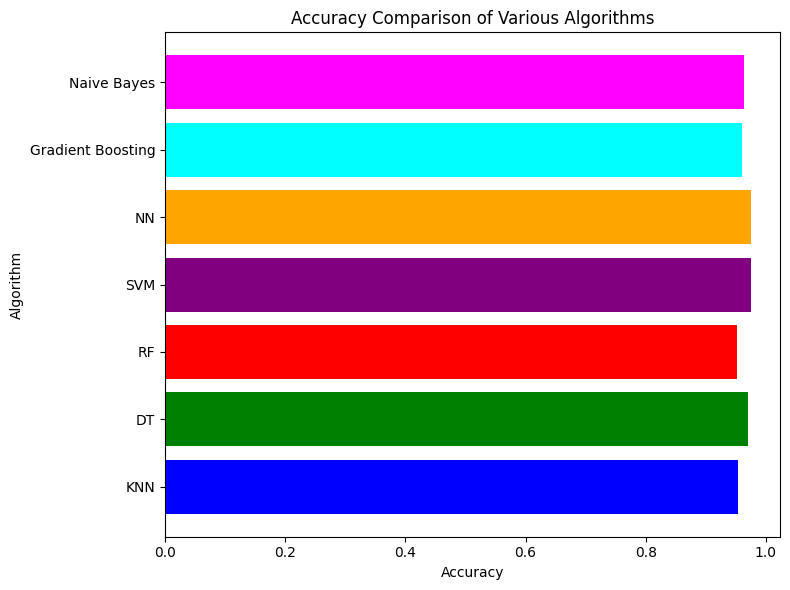

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Lists of accuracies and algorithms
accuracies = [accuracy_score(y_test, preds) for preds in [y_pred_knn, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_nn, y_pred_gb, y_pred_nb]]
algorithms = ['KNN', 'DT', 'RF', 'SVM', 'NN', 'Gradient Boosting', 'Naive Bayes']

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy Comparison of Various Algorithms')
plt.tight_layout()
plt.show()

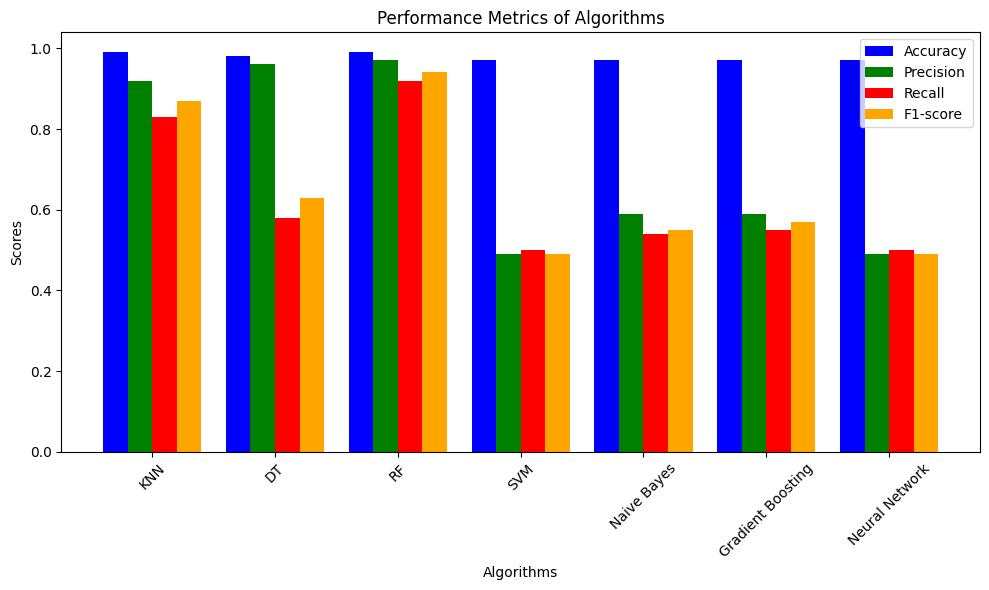

In [ ]:
# Sample data for accuracy, precision, recall, and F1-score
algorithms = ['KNN', 'DT', 'RF', 'SVM', 'Naive Bayes', 'Gradient Boosting', 'Neural Network']
accuracy = [0.99, 0.98, 0.99, 0.97, 0.97, 0.97, 0.97]
precision = [0.92, 0.96, 0.97, 0.49, 0.59, 0.59, 0.49]
recall = [0.83, 0.58, 0.92, 0.50, 0.54, 0.55, 0.50]
f1_score = [0.87, 0.63, 0.94, 0.49, 0.55, 0.57, 0.49]

bar_width = 0.2  # Adjust the width for space between bars

# Generating bar positions
bar_positions = list(range(len(algorithms)))

# Plotting the bar graphs
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, accuracy, color='blue', width=bar_width, label='Accuracy')
plt.bar([pos + bar_width for pos in bar_positions], precision, color='green', width=bar_width, label='Precision')
plt.bar([pos + 2 * bar_width for pos in bar_positions], recall, color='red', width=bar_width, label='Recall')
plt.bar([pos + 3 * bar_width for pos in bar_positions], f1_score, color='orange', width=bar_width, label='F1-score')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Metrics of Algorithms')
plt.xticks([pos + 1.5 * bar_width for pos in bar_positions], algorithms, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()